In [1]:
!pip install threddsclient
import threddsclient
import xarray as xr

  Preparing metadata (setup.py) ... done
  Created wheel for threddsclient: filename=threddsclient-0.4.2-py3-none-any.whl size=12550 sha256=f093df2895685e3c2687d18ee9d41f5211bd99f667e66f424537f7382c50d078
  Stored in directory: /home/jovyan/.cache/pip/wheels/8d/af/56/84d32f4915730bb6837d1c5ddea521a218e512e618e1e6f39a
Successfully built threddsclient


In [2]:
all_opendap_urls = threddsclient.opendap_urls(
'https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]
# get all scattering data urls
opendap_urls = [x for x in opendap_urls if 'sulphate_total' in x]

opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.19891101070000.20210420142507.filter_3pack.sulphate_total.aerosol.3y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc']

In [3]:
dsmf = xr.open_mfdataset(opendap_urls)
dsmf

<xarray.Dataset>
Dimensions:                                  (time: 1157, tbnds: 2,
                                              metadata_time: 4,
                                              sulphate_total_ug_S_per_m3_qc_flags: 1,
                                              sulphate_total_ug_per_m3_qc_flags: 1)
Coordinates:
  * time                                     (time) datetime64[ns] 1989-11-01...
  * metadata_time                            (metadata_time) datetime64[ns] 1...
Dimensions without coordinates: tbnds, sulphate_total_ug_S_per_m3_qc_flags,
                                sulphate_total_ug_per_m3_qc_flags
Data variables:
    time_bnds                                (time, tbnds) datetime64[ns] dask.array<chunksize=(1157, 2), meta=np.ndarray>
    metadata_time_bnds                       (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(4, 2), meta=np.ndarray>
    sulphate_total_ug_per_m3_ebasmetadata    (metadata_time) |S64 dask.array<chunksize=(4,), meta=np.ndarray>
    sulphate_total_ug_S_per_m3               (time) float64 dask.array<chunksize=(1157,), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_qc            (sulphate_total_ug_S_per_m3_qc_flags, time) float64 dask.array<chunksize=(1, 1157), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_ebasmetadata  (metadata_time) |S64 dask.array<chunksize=(4,), meta=np.ndarray>
    sulphate_total_ug_per_m3_qc              (sulphate_total_ug_per_m3_qc_flags, time) float64 dask.array<chunksize=(1, 1157), meta=np.ndarray>
    sulphate_total_ug_per_m3                 (time) float64 dask.array<chunksize=(1157,), meta=np.ndarray>
Attributes: (12/93)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of s...
    keywords:                          NO0042G, Zeppelin mountain (Ny-Ålesund...
    id:                                NO0042G.19891101070000.20210420142507....
    naming_authority:                  EBAS
    ...                                ...
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    comment:                           {\n    "Data definition": "EBAS_1.1", ...
    standard_name_vocabulary:          CF-1.7, ACDD-1.3
    history:                           None
    creator_url:                       ebas.nilu.no

In [6]:
dsmf.sulphate_total_ug_per_m3.compute()

<xarray.DataArray 'sulphate_total_ug_per_m3' (time: 1157)>
array([0.4, 0.8, 0.1, ..., 0.3, 0.1, 0.4])
Coordinates:
  * time     (time) datetime64[ns] 1989-11-01T19:00:00 ... 1992-12-31T19:00:00
Attributes:
    standard_name:                     mass_concentration_of_total_sulphateex...
    units:                             ug/m3
    ancillary_variables:               sulphate_total_ug_per_m3_qc sulphate_t...
    cell_methods:                      time: mean
    ebas_station_setting:              Polar
    ebas_unit:                         ug/m3
    ebas_station_longitude:            11.88668
    ebas_submitter:                    Hjellbrekke, Anne, agh@nilu.no, Norweg...
    ebas_station_gaw_type:             G
    ebas_framework_contact_name:       Wenche Aas, Wenche Aas, Kjetil Tørseth...
    ebas_framework_name:               , OSPARCOM - Comprehensive Atmospheric...
    ebas_volume_std_temperature:       ambient
    ebas_organization:                 NO01L, Norwegian Institute for Air Res...
    ebas_comment:                      Data converted on export from EBAS fro...
    ebas_standard_method:              SOP=EMEP_manual_v2014
    ebas_station_name:                 Zeppelin mountain (Ny-Ålesund)
    ebas_component:                    sulphate_total
    ebas_framework_acronym:            AMAP, CAMP, EMEP, EUSAAR, GAW-WDCA, NILU
    ebas_station_gaw_id:               ZEP
    ebas_statistics:                   arithmetic mean
    ebas_station_gaw_name:             Zeppelin Mountain (Ny Ålesund)
    ebas_laboratory_code:              NO01L
    ebas_framework_description:        , The OSPARCOM Comprehensive Atmospher...
    ebas_station_wmo_region:           6
    ebas_platform_code:                NO0042S
    ebas_inlet_type:                   Hat or hood
    ebas_station_wdca_id:              GAWANO__ZEP
    ebas_station_latitude:             78.90715
    ebas_station_code:                 NO0042G
    ebas_instrument_name:              f3p_d_0042
    ebas_medium:                       Teflon
    ebas_matrix:                       aerosol
    ebas_regime:                       IMG
    ebas_instrument_type:              filter_3pack
    ebas_data_level:                   2
    ebas_volume_std_pressure:          ambient
    ebas_revision_date:                20210420142507
    ebas_station_altitude:             474.0 m
    ebas_originator:                   Aas, Wenche, waa@nilu.no, Norwegian In...
    ebas_station_land_use:             Gravel and stone
    ebas_method_ref:                   NO01L_IC
    ebas_framework_contact_email:      waa@nilu.no, waa@nilu.no, kt@nilu.no, ...
    ebas_humidity_temperaure_control:  None

In [7]:
dsmf.compute()

<xarray.Dataset>
Dimensions:                                  (time: 1157, tbnds: 2,
                                              metadata_time: 4,
                                              sulphate_total_ug_S_per_m3_qc_flags: 1,
                                              sulphate_total_ug_per_m3_qc_flags: 1)
Coordinates:
  * time                                     (time) datetime64[ns] 1989-11-01...
  * metadata_time                            (metadata_time) datetime64[ns] 1...
Dimensions without coordinates: tbnds, sulphate_total_ug_S_per_m3_qc_flags,
                                sulphate_total_ug_per_m3_qc_flags
Data variables:
    time_bnds                                (time, tbnds) datetime64[ns] 198...
    metadata_time_bnds                       (metadata_time, tbnds) datetime64[ns] ...
    sulphate_total_ug_per_m3_ebasmetadata    (metadata_time) |S64 b'{\n    "e...
    sulphate_total_ug_S_per_m3               (time) float64 0.15 0.28 ... 0.14
    sulphate_total_ug_S_per_m3_qc            (sulphate_total_ug_S_per_m3_qc_flags, time) float64 ...
    sulphate_total_ug_S_per_m3_ebasmetadata  (metadata_time) |S64 b'{\n    "e...
    sulphate_total_ug_per_m3_qc              (sulphate_total_ug_per_m3_qc_flags, time) float64 ...
    sulphate_total_ug_per_m3                 (time) float64 0.4 0.8 ... 0.1 0.4
Attributes: (12/93)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of s...
    keywords:                          NO0042G, Zeppelin mountain (Ny-Ålesund...
    id:                                NO0042G.19891101070000.20210420142507....
    naming_authority:                  EBAS
    ...                                ...
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    comment:                           {\n    "Data definition": "EBAS_1.1", ...
    standard_name_vocabulary:          CF-1.7, ACDD-1.3
    history:                           None
    creator_url:                       ebas.nilu.no

In [8]:
dsmf.sulphate_total_ug_S_per_m3_qc.compute()

<xarray.DataArray 'sulphate_total_ug_S_per_m3_qc' (
                                                   sulphate_total_ug_S_per_m3_qc_flags: 1,
                                                   time: 1157)>
array([[ nan,  nan, 781., ...,  nan,  nan,  nan]])
Coordinates:
  * time     (time) datetime64[ns] 1989-11-01T19:00:00 ... 1992-12-31T19:00:00
Dimensions without coordinates: sulphate_total_ug_S_per_m3_qc_flags
Attributes:
    units:          1
    standard_name:  status_flag

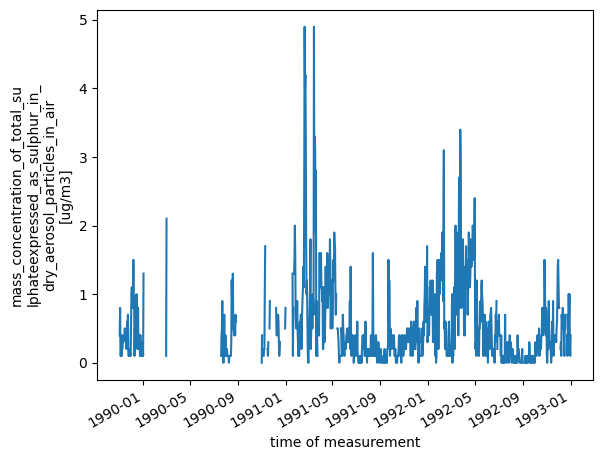

In [4]:
dsmf['sulphate_total_ug_per_m3'].plot()

In [10]:
dsmf['time_bnds'].plot()

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>)

In [11]:
dsmf

<xarray.Dataset>
Dimensions:                                  (time: 1157, tbnds: 2,
                                              metadata_time: 4,
                                              sulphate_total_ug_S_per_m3_qc_flags: 1,
                                              sulphate_total_ug_per_m3_qc_flags: 1)
Coordinates:
  * time                                     (time) datetime64[ns] 1989-11-01...
  * metadata_time                            (metadata_time) datetime64[ns] 1...
Dimensions without coordinates: tbnds, sulphate_total_ug_S_per_m3_qc_flags,
                                sulphate_total_ug_per_m3_qc_flags
Data variables:
    time_bnds                                (time, tbnds) datetime64[ns] dask.array<chunksize=(1157, 2), meta=np.ndarray>
    metadata_time_bnds                       (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(4, 2), meta=np.ndarray>
    sulphate_total_ug_per_m3_ebasmetadata    (metadata_time) |S64 dask.array<chunksize=(4,), meta=np.ndarray>
    sulphate_total_ug_S_per_m3               (time) float64 dask.array<chunksize=(1157,), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_qc            (sulphate_total_ug_S_per_m3_qc_flags, time) float64 dask.array<chunksize=(1, 1157), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_ebasmetadata  (metadata_time) |S64 dask.array<chunksize=(4,), meta=np.ndarray>
    sulphate_total_ug_per_m3_qc              (sulphate_total_ug_per_m3_qc_flags, time) float64 dask.array<chunksize=(1, 1157), meta=np.ndarray>
    sulphate_total_ug_per_m3                 (time) float64 dask.array<chunksize=(1157,), meta=np.ndarray>
Attributes: (12/93)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of s...
    keywords:                          NO0042G, Zeppelin mountain (Ny-Ålesund...
    id:                                NO0042G.19891101070000.20210420142507....
    naming_authority:                  EBAS
    ...                                ...
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    comment:                           {\n    "Data definition": "EBAS_1.1", ...
    standard_name_vocabulary:          CF-1.7, ACDD-1.3
    history:                           None
    creator_url:                       ebas.nilu.no

In [12]:
# Find url addresses for files on EBAS

all_opendap_urls = threddsclient.opendap_urls(
'https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]
# get all scattering data urls
opendap_urls = [x for x in opendap_urls if 'particle_number_size_distribution' in x]
opendap_urls = [x for x in opendap_urls if 'lev2' in x]

opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.3y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.1y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20060101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.2y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20000301000000.20170523103005.dmps.particle_number_size_distribution.aerosol.6y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc']

In [116]:
# read multiple files
# the problem with this example is, that the files are from different instruments

dsmf08 = xr.open_mfdataset(opendap_urls[:1])
dsmf08

<xarray.Dataset>
Dimensions:                                         (time: 26280, tbnds: 2,
                                                     metadata_time: 3, D: 20,
                                                     particle_number_size_distribution_qc_flags: 2)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 10.0 ... 794.3
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] dask.array<chunksize=(26280, 2), meta=np.ndarray>
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(3, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(20, 3), meta=np.ndarray>
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 dask.array<chunksize=(20, 2, 26280), meta=np.ndarray>
    particle_number_size_distribution               (D, time) float64 dask.array<chunksize=(20, 26280), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20080101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

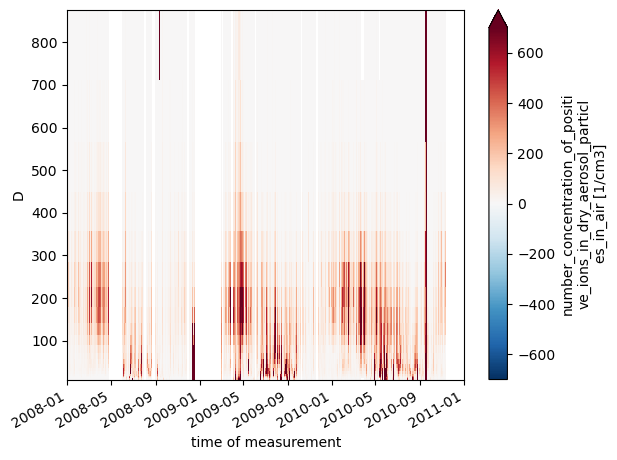

In [30]:
dsmf['particle_number_size_distribution'].plot(vmax=7e2)

In [59]:
dsmf = xr.open_mfdataset(opendap_urls[1:2])
dsmf

<xarray.Dataset>
Dimensions:                                                  (time: 8760,
                                                              tbnds: 2,
                                                              metadata_time: 1,
                                                              D: 20,
                                                              particle_number_size_distribution_perc8413_qc_flags: 2,
                                                              particle_number_size_distribution_prec1587_qc_flags: 2)
Coordinates:
  * time                                                     (time) datetime64[ns] ...
  * metadata_time                                            (metadata_time) datetime64[ns] ...
  * D                                                        (D) float64 10.0...
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_perc8413_qc_flags,
                                particle_number_size_distribution_prec1587_qc_flags
Data variables:
    time_bnds                                                (time, tbnds) datetime64[ns] dask.array<chunksize=(8760, 2), meta=np.ndarray>
    metadata_time_bnds                                       (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    particle_number_size_distribution_perc8413_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(20, 1), meta=np.ndarray>
    particle_number_size_distribution_perc8413_qc            (D, particle_number_size_distribution_perc8413_qc_flags, time) float64 dask.array<chunksize=(20, 2, 8760), meta=np.ndarray>
    particle_number_size_distribution_prec1587_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(20, 1), meta=np.ndarray>
    particle_number_size_distribution_prec1587_qc            (D, particle_number_size_distribution_prec1587_qc_flags, time) float64 dask.array<chunksize=(20, 2, 8760), meta=np.ndarray>
    particle_number_size_distribution_prec1587               (D, time) float64 dask.array<chunksize=(20, 8760), meta=np.ndarray>
    particle_number_size_distribution_perc8413               (D, time) float64 dask.array<chunksize=(20, 8760), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20080101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

In [77]:
ma = dsmf['particle_number_size_distribution_perc8413'].replace('D')<1e5

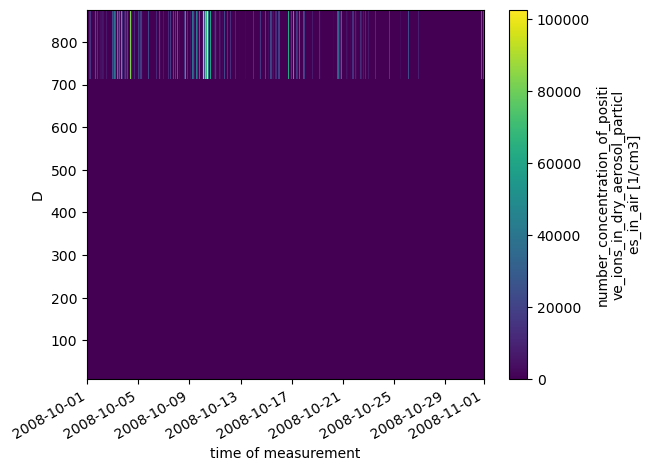

In [79]:
dsmf['particle_number_size_distribution_perc8413'].sel(time=slice('2008-10','2008-10')).plot()

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


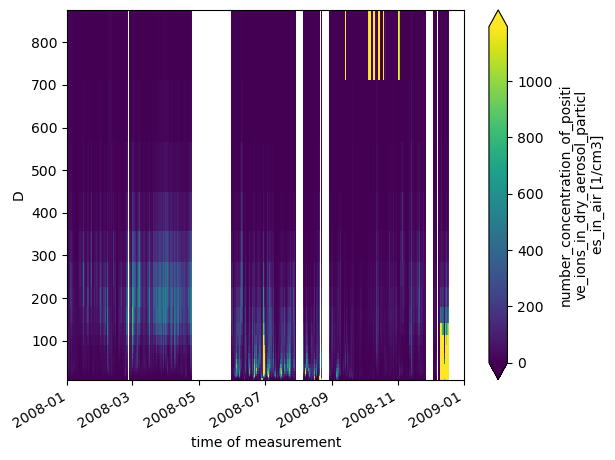

In [78]:
dsmf['particle_number_size_distribution_perc8413'].where(ma).plot(robust=True)

In [52]:
opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.3y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.1y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20060101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.2y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20000301000000.20170523103005.dmps.particle_number_size_distribution.aerosol.6y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc']

In [112]:
dsmf06 = xr.open_mfdataset(opendap_urls[2:3])
dsmf06

<xarray.Dataset>
Dimensions:                                         (time: 17520, tbnds: 2,
                                                     metadata_time: 2, D: 17,
                                                     particle_number_size_distribution_qc_flags: 1)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 15.67 ... 630.9
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] dask.array<chunksize=(17520, 2), meta=np.ndarray>
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(2, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(17, 2), meta=np.ndarray>
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 dask.array<chunksize=(17, 1, 17520), meta=np.ndarray>
    particle_number_size_distribution               (D, time) float64 dask.array<chunksize=(17, 17520), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20060101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

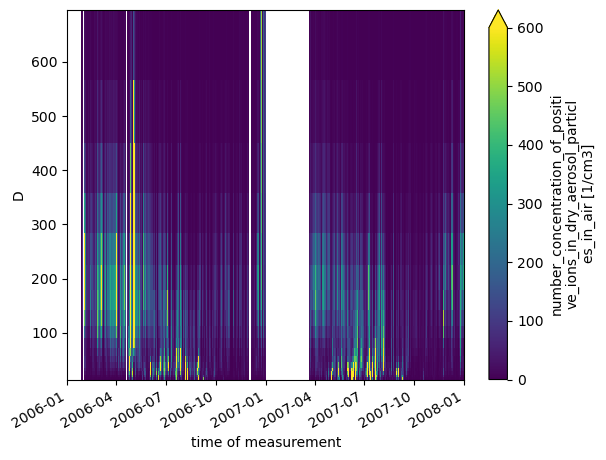

In [113]:
dsmf06['particle_number_size_distribution'].plot(vmax=6e2)

In [53]:
48960-17520

31440

In [106]:
dsmf00 = xr.open_mfdataset(opendap_urls[3:4])
dsmf00

<xarray.Dataset>
Dimensions:                                         (time: 48960, tbnds: 2,
                                                     metadata_time: 6, D: 16,
                                                     particle_number_size_distribution_qc_flags: 1)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 19.97 ... 630.9
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] dask.array<chunksize=(48960, 2), meta=np.ndarray>
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(6, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(16, 6), meta=np.ndarray>
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 dask.array<chunksize=(16, 1, 48960), meta=np.ndarray>
    particle_number_size_distribution               (D, time) float64 dask.array<chunksize=(16, 48960), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20000301000000.20170523103005.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

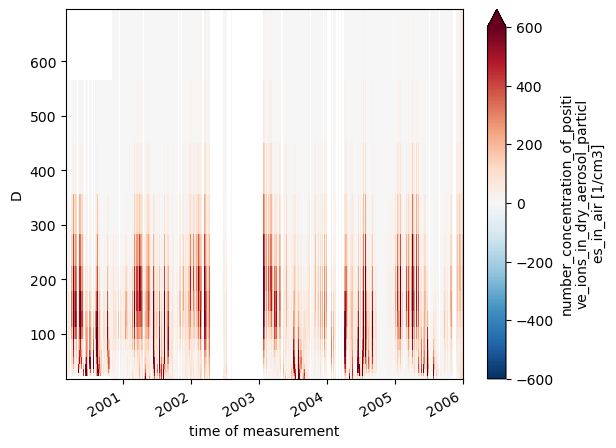

In [107]:
dsmf00['particle_number_size_distribution'].plot(vmax=6e2)

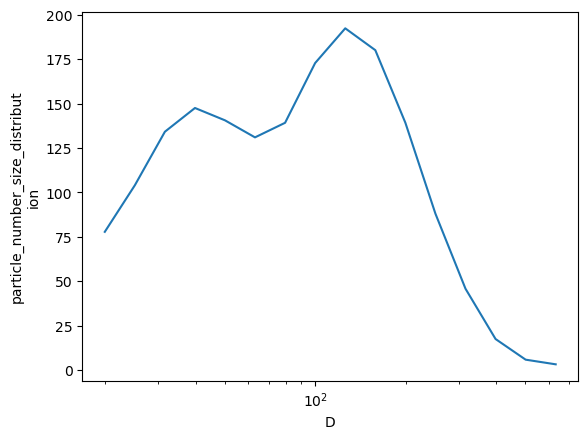

In [108]:
dsmf00['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")

In [114]:
dsmf06 = xr.open_mfdataset(opendap_urls[2:3])
dsmf06

<xarray.Dataset>
Dimensions:                                         (time: 17520, tbnds: 2,
                                                     metadata_time: 2, D: 17,
                                                     particle_number_size_distribution_qc_flags: 1)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 15.67 ... 630.9
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] dask.array<chunksize=(17520, 2), meta=np.ndarray>
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(2, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(17, 2), meta=np.ndarray>
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 dask.array<chunksize=(17, 1, 17520), meta=np.ndarray>
    particle_number_size_distribution               (D, time) float64 dask.array<chunksize=(17, 17520), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20060101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

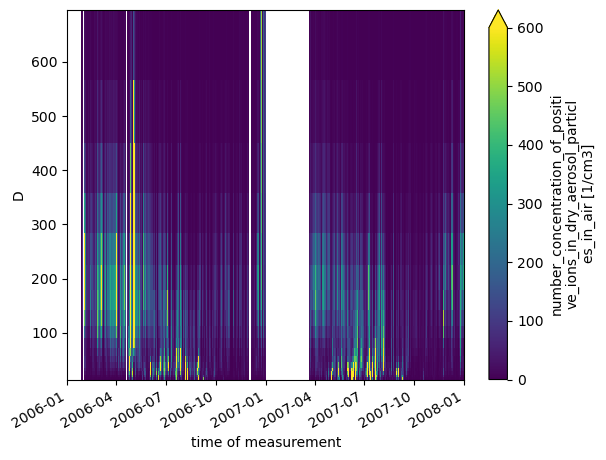

In [127]:
dsmf06['particle_number_size_distribution'].plot(vmax=6e2)

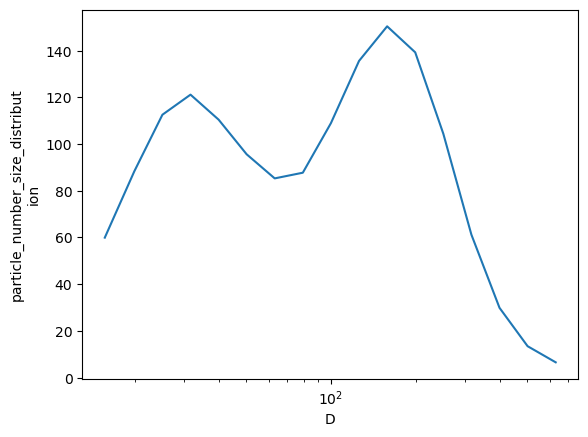

In [128]:
dsmf06['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")

In [123]:
dsmf08 = xr.open_mfdataset(opendap_urls[:1])
dsmf08

<xarray.Dataset>
Dimensions:                                         (time: 26280, tbnds: 2,
                                                     metadata_time: 3, D: 20,
                                                     particle_number_size_distribution_qc_flags: 2)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 10.0 ... 794.3
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] dask.array<chunksize=(26280, 2), meta=np.ndarray>
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(3, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(20, 3), meta=np.ndarray>
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 dask.array<chunksize=(20, 2, 26280), meta=np.ndarray>
    particle_number_size_distribution               (D, time) float64 dask.array<chunksize=(20, 26280), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20080101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

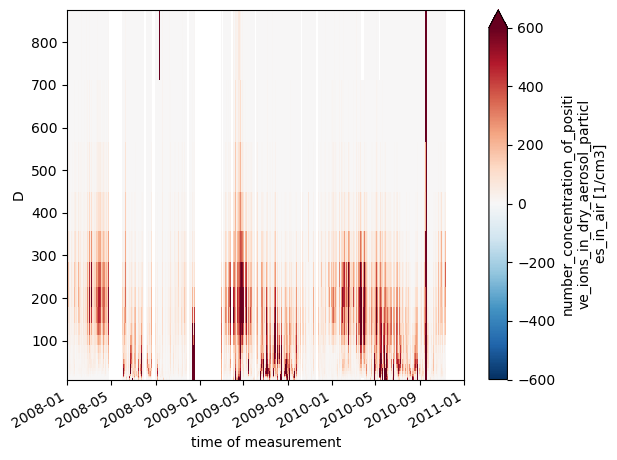

In [130]:
dsmf08['particle_number_size_distribution'].plot(vmax = 6e2)

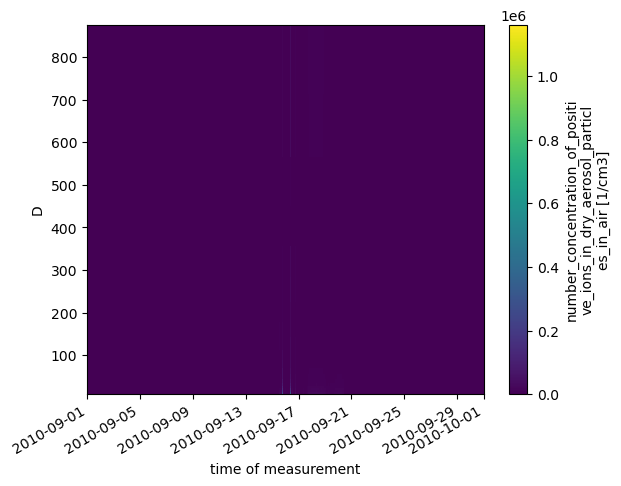

In [132]:
dsmf08['particle_number_size_distribution'].sel(time = slice('2010-09','2010-09')).plot()

In [141]:
ma = dsmf08['particle_number_size_distribution'].max('D')<1e4

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


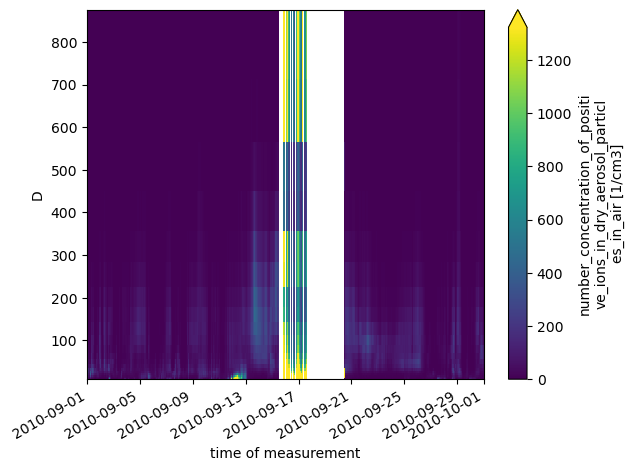

In [139]:
dsmf08['particle_number_size_distribution'].where(ma).sel(time = slice('2010-09','2010-09')).plot(robust=True)

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


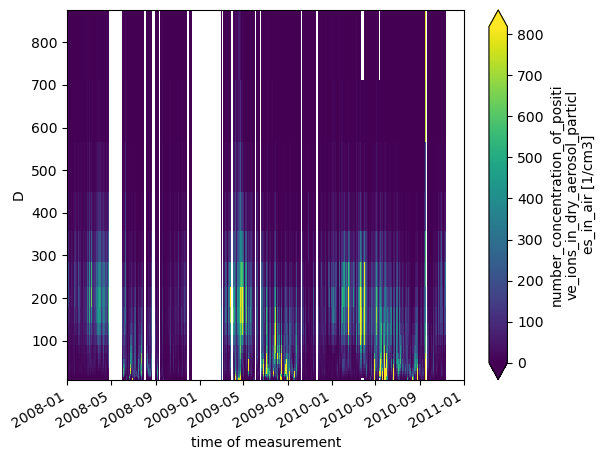

In [142]:
dsmf08['particle_number_size_distribution'].where(ma).plot(robust=True)

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


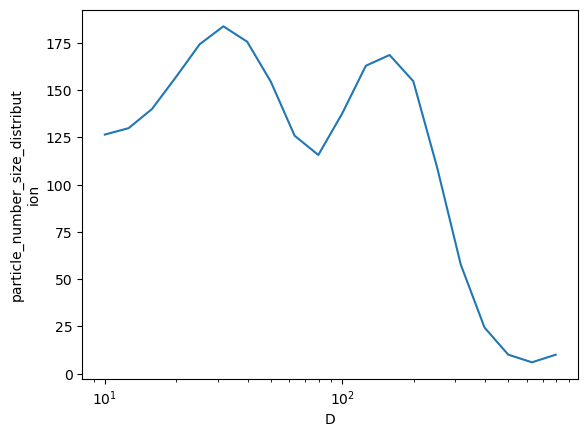

In [144]:
# New version: I was trying to get rid of the weird numbers at the top but got rid of lots of the data.
# <-----
dsmf08['particle_number_size_distribution'].where(ma).mean(dim = "time").plot(xscale = "log")

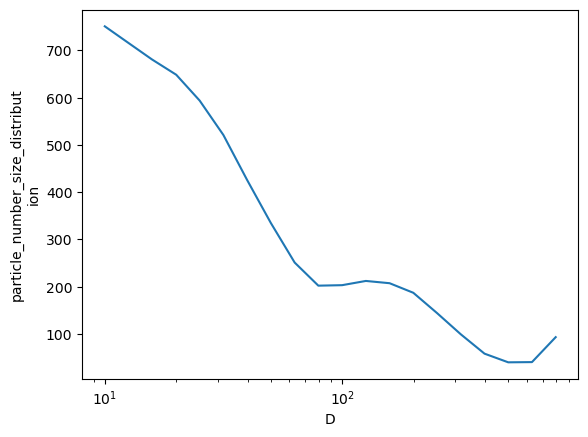

In [125]:
#This is what it looked like at first
# <------
dsmf08['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")